# `geopandas`

Geopandas is a Python Library that extends `pandas` by adding support for geospatial data.

## Reproducible file paths

Let's import the packages we'll be working with:

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
fp = os.path.join('data', 'gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

We can use this filepath to import the shapefile using the `geopandas.read_file()` function:

In [3]:
pigs = gpd.read_file(fp)
pigs

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


In [4]:
ca_fp = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')
ca = gpd.read_file(ca_fp)
ca

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrames

`gpd.GeoDataFrame` = `pandas.DataFrame` + geometry column

Example:

Notice the `geometry` column in the `pigs` dataframe:

In [61]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [62]:
# Check what kind of object is pigs
print(type(pigs))

# Check what kind of object is the geometry column
print(type(pigs.geometry))

# and the species column
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the values in each column:

In [63]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [64]:
# Check the geometry type of each element in the geometry column:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

In [65]:
# What is the geometry type of the single feature in the CA state boundary? And why does it make sense to have this kind of geometry?
ca.geometry.geom_type

0    MultiPolygon
dtype: object

## CRS and Extent

CRS = coordinate reference system
Extent = the area that the map covers

In [66]:
# Check CRS for pigs
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
# Get more information about the CRS
print('ellipsoid', pigs.crs.ellipsoid)
print('datum', pigs.crs.datum)
print('is geographic?', pigs.crs.is_geographic)
print('is projected?', pigs.crs.is_projected)

ellipsoid WGS 84
datum World Geodetic System 1984 ensemble
is geographic? True
is projected? False


- What are the ellipsoid and the datum? What are they telling us about the CRS?
- What does it mean that the CRS is geographic and not projected?

In [68]:
# Obtaint the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Check -in 

Print the CRS and extent for the CA boundary
Are both geodataframes in the same CRS?

In [69]:
print(ca.total_bounds)
print(pigs.total_bounds)
print(ca.crs)
print(pigs.crs)

[-124.48201686   32.52883674 -114.13122248   42.00950827]
[-124.29448    32.593433 -115.4356     40.934296]
epsg:4326
epsg:4326


## Data wrangling

Since `geopandas` is built on top of `pandas`, we may use everything we have learned about data selection, wrangling and modification for `pandas.DataFrames` to wrangle geo-dataframes.

Example:

We only want to use recent data for wild pig observations. 

In [70]:
# Examine the observations by year:
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [71]:
## Let's say we only want data from 2020 onwards...

pigs_recent = pigs[pigs.year >=2020]

# check the length of the original dataframe:
print('Total observations: ', len(pigs))

# check length of new dataframe:
print('Total obs since 2020: ', len(pigs_recent))

Total observations:  1046
Total obs since 2020:  606


## Create a map

geo-dataframes also have a `plot()` method that we can quickly make a map with:

<AxesSubplot:>

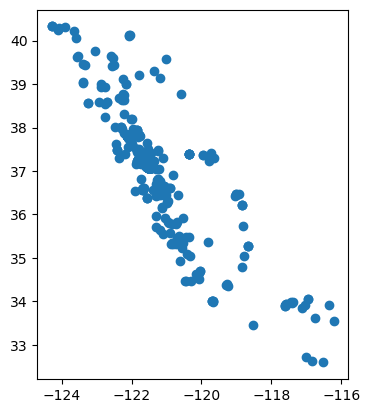

In [72]:
pigs_recent.plot()

## `matplotlib`'s `fig` and `ax`

Matplotlib graphs the data in a figure, which can have one or more axes.
The axes are only the area specified by a pair of x,y axes and what is plotted in it.
The FIGURE may have more than one axis. 

To create a blank figure:

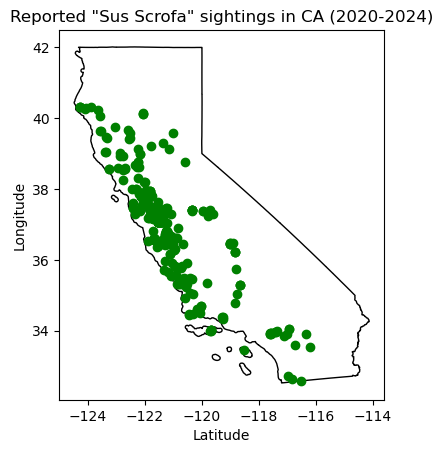

In [87]:
# Initialize an empty figure (fig) and axes (ax)

fig, ax = plt.subplots()


# adding CA

ca.plot(ax=ax,
       color = "none",
       edgecolor = "black")

# adding pigs

pigs_recent.plot(ax=ax,
                color = 'green')

# customization

ax.set_title('Reported "Sus Scrofa" sightings in CA (2020-2024)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

In [ ]:
## Add layers:

